<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 22: Causality

Associated Textbook Sections: [12.2](https://ccsf-math-108.github.io/textbook/chapters/12/2/Causality.html)

---

## Outline

* [Causality](#Causality)
* [An Error Probability](#An-Error-Probability)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Causality

---

### Randomized Controlled Experiment

* Sample A: control group
* Sample B: treatment group
* If the treatment and control groups are selected at random, then you can make causal conclusions.
* Any difference in outcomes between the two groups could be due to chance or the treatment.


---

### Demo: Randomized Control Experiment

* Load the data in `bta.csv` that is associated with [an experiment to assess whether or not Botox can be used to reduce pain](https://journals.lww.com/clinicalpain/Abstract/2006/01000/The_Effect_of_Small_Doses_of_Botulinum_Toxin_A_on.11.aspx) (Neck-Shoulder Myofascial Pain Syndrome). The control group received a saline solution, while the treatment group received botulinum toxin type A. A 1 result means that there was a reduction in pain, and a 0 result means that there wasn't a reduction in pain.
* Compare the results for the two groups.

In [ ]:
botox = Table.read_table('bta.csv')
botox

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [ ]:
botox.pivot('Result','Group')

Group,0.0,1.0
Control,14,2
Treatment,6,9


In [ ]:
botox.group('Group',np.average)

Group,Result average
Control,0.125
Treatment,0.6


0.125 is 2/16 and 0.6 is 9/15 .VB

---

### Before the Randomization

* Population: All people who have neck pain
* Sample: 31 people from the population
    * 15 were **randomly** assigned to the treatment
    * 16 were **randomly** assigned to the control

```mermaid
graph LR
    A["Sample of Size 31"] -->|"Random Assigment"| B["16 Tickets - Control"]
    B --> D{"Hypothesis Test"}
    C["15 tickets - Treatment"] --> D
    A -->|"Random Assigment"| C
```

_It was as if there were 15 tickets that said 'Treatment' and 16 that said 'Control' put into a hat and all subjects drew their group out of a hat._

---

### The Hypotheses

* Null: There is no difference between the treatment and the control in how they reduce neck pain.
* Alternative: The treatment (botox) has a positive effect on reducing neck pain.

---

### Demo: Testing the Hypothesis

* Compute the observed difference in results for the treatment and control groups using the `difference_of_means` function.
* Use `one_simulated_difference` to determine the chance of observing the above sample data if it were true that Botox had no impact on pain reduction.

In [ ]:
def difference_of_means(table, numeric_label, group_label):
    '''
    Takes: name of table, column label of numerical variable,
    column label of group-label variable

    Returns: Difference of means of the two groups
    '''

    #table with the two relevant columns
    reduced = table.select(numeric_label, group_label)

    # table containing group means
    means_table = reduced.group(group_label, np.average)

    # array of group means
    means = means_table.column(1)

    return means.item(1) - means.item(0)

In [ ]:
observed_diff = difference_of_means(botox, "Result", "Group")
observed_diff

0.475

In [ ]:
def one_simulated_difference(table, numeric_label, group_label):
    '''
    Takes: name of table, column label of numerical variable,
    column label of group-label variable

    Returns: Difference of means of the two groups after shuffling labels
    '''

    # array of shuffled labels
    shuffled_labels = table.sample(
        with_replacement = False).column(group_label)

    # table of numerical variable and shuffled labels
    shuffled_table = table.select(numeric_label).with_column(
        'Shuffled Label', shuffled_labels)

    return difference_of_means(
        shuffled_table, numeric_label, 'Shuffled Label')

In [ ]:
one_simulated_difference(botox, 'Result', 'Group')

0.3458333333333333

In [ ]:
simulated_diffs = make_array()
reps = 10_000

for i in np.arange(reps):
    sim_diff = one_simulated_difference(botox, 'Result', 'Group')
    simulated_diffs = np.append(simulated_diffs, sim_diff)

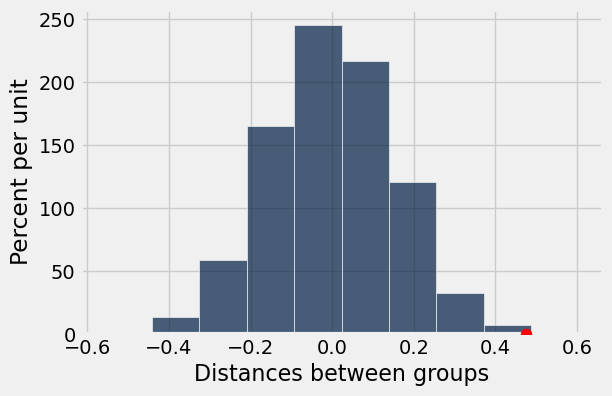

In [ ]:
col_name = 'Distances between groups'
Table().with_column(col_name, simulated_diffs).hist(col_name)
plt.scatter(observed_diff, 0, color="red", s=60, zorder=3);

In [ ]:
p_value = sum(simulated_diffs >= observed_diff) / len(simulated_diffs)
np.round(p_value, 3)

0.0089999999999999993

if you want to see if the which group is different etc don't use absolute value , we use abs only when we don't care about which one is different.VB

---

### Random Assignment & Shuffling

<img src="./random_assignment_and_shuffling.png" width=80%>

---

## An Error Probability

---

### Can the Conclusion be Wrong?

| | Null is True | Alternative is True |
| --- | ----------- | ---|
| (Type I Error) Test favors the Null | ✅ | ❌ |
| (Type II Error) Test favors the Alternative | ❌ | ✅ |

* Type I Error - False Positive
* Type II Error - False Negative

---

### An Error Probability

* The cutoff for the P-value is the Type I error probability.
* If your cutoff is 5% and the null hypothesis happens to be true, then there is about a 5% chance that your test will reject the null hypothesis. (Type I Error: 5%)
* The chance of making a Type II error is the complement value to the statistical power of the test. You are not expected to know about the power of a test or what the chance of making a Type II error is in this class.

---

### P-value cutoff vs P-value

* P-value cutoff
    * Does not depend on observed data or simulation
    * Decide on it before seeing the results
    * Conventional values at 5% and 1%
    * Probability of hypothesis testing making an error
* P-value
    * Depends on the observed data and simulation
    * Probability under the null hypothesis that the test statistic is the observed value or further towards the alternative


---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>